# Stanford CME 241 (Winter 2024) - Assignment 2

**Due: Jan 22 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Please solve questions 1 and 2, and choose one of questions 3 or 4.**
- Questions 1 and 2 of this homework focus on Markov Processes (MP and MRP) that were taught in class in the second week and are covered in Chapter 3 of the book. 
- Questions 3 and 4 cover Markov Decision Processes that will be taught in the third week and are covered in Chapter 4 of the book.
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/callmecampos/RL-stochastic/hw2/assignment2.ipynb

## Imports

In [50]:
import sys
sys.path.append('..')

from rl.markov_process import *
from typing import List
import matplotlib.pyplot as plt

## Question 1
In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.

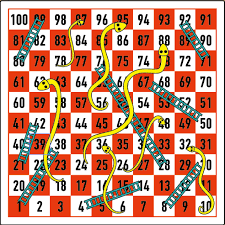

### Part a
Formalize the state space of the Snakes and Ladders game.

In [111]:
# grid = [[((i - 1) * 10) + j for j in (range(10, 0, -1) if i % 2 == 0 else range(1, 11))] for i in range(10, 0, -1)] # 1-100
# grid

states = list(range(1, 101))
print("Snakes and Ladders State Space: ")
print(states)

Snakes and Ladders State Space: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


### Part b
Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

In [112]:
snakes_n_ladders = { 1 : 38, 4 : 14, 36 : 6, 8 : 30, 32 : 10,
                    62 : 18,
                    21 : 42, 88 : 24, 48 : 26, 28 : 76,
                    50 : 67, 95 : 56,
                    71 : 92, 97 : 78,
                    80 : 99 }

print(len(snakes_n_ladders))

# see below

15


### Part c
Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces.

In [113]:
class SNLFiniteDistribution(FiniteDistribution[S]):
    def __init__(self, possible_states: List[S], transition_probabilities: List[S]):
        self.transition_table = dict(zip(possible_states, transition_probabilities))
    
    def table(self) -> Mapping[S, float]:
        return self.transition_table

def snl_transition_probabilities(state: S) -> Transition[S]:
    possible_states = []
    transition_probs = []

    if state != 100:
        def next_state(_state: S):
            if _state == 100:
                return 100 # terminal state
                
            next = _state + 1
            if _state in snakes_n_ladders:
                next = snakes_n_ladders[_state]
        
            return next
    
        curr_state = state
        for i in range(6):
            curr_state = next_state(curr_state)
            possible_states.append(curr_state)
            if curr_state == 100:
                transition_probs.append((6-i) / 6)
                break
            transition_probs.append(1/6)

    return SNLFiniteDistribution(possible_states, transition_probs)

# exclusive range since 100 is a terminal state
snl_transition_map: Transition[S] = { state : snl_transition_probabilities(state) for state in range(1, 100) }

snl_markov_process = FiniteMarkovProcess(snl_transition_map)

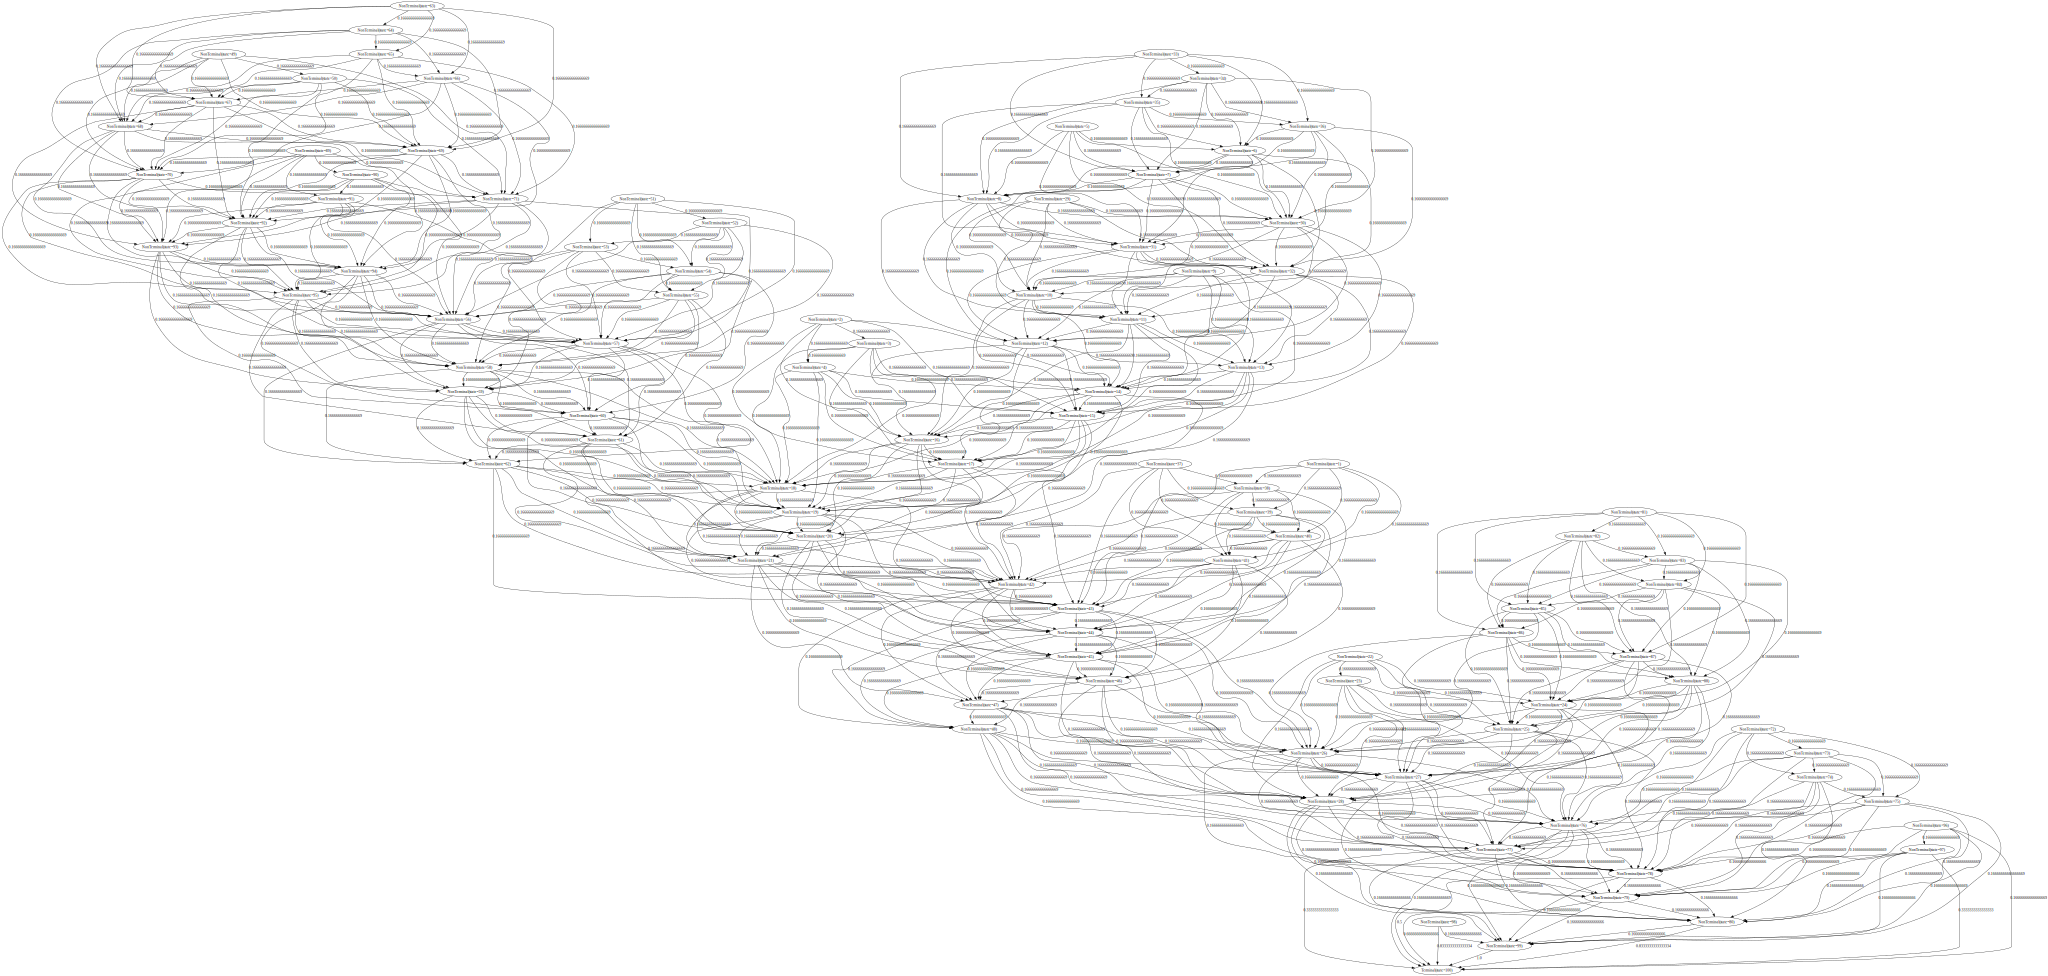

In [114]:
snl_markov_process.generate_image()

### Part d
Plot the sample traces and a graph of the distribution of time steps to finish the game.

In [115]:
class SNLDistribution(Distribution[S]):
    def sample(self) -> S:
        return NonTerminal(state=1)

    def expectation(self, f: Callable[[S], float]) -> float:
        return 1 * f(1)

snl_traces = snl_markov_process.traces(SNLDistribution())

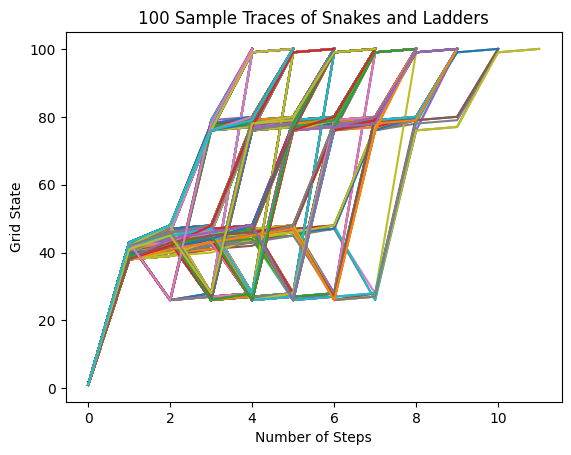

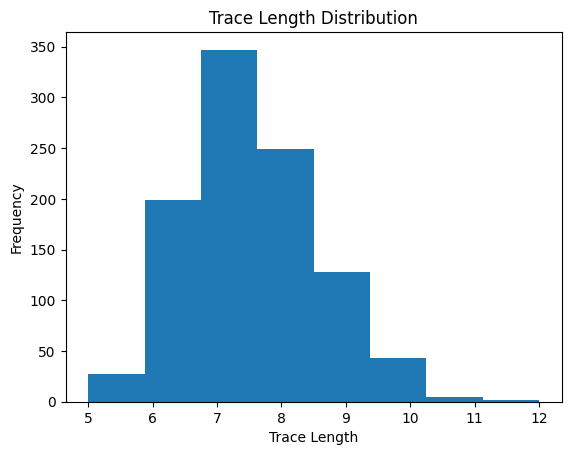

In [123]:
NUM_TRACES = 1000
all_traces = []
for i in range(NUM_TRACES):
    sample_traces = []
    new_trace = next(snl_traces)
    while len(sample_traces) == 0 or isinstance(sample_traces[-1], NonTerminal):
        sample_traces.append(next(new_trace))

    all_traces.append(sample_traces)
    plt.plot(range(len(sample_traces)), [s.state for s in sample_traces])

trace_lens = [len(t) for t in all_traces]
plt.title("100 Sample Traces of Snakes and Ladders")
plt.xlabel("Number of Steps")
plt.ylabel("Grid State")
plt.show()

plt.hist(trace_lens, bins=len(set(trace_lens)))
plt.title("Trace Length Distribution")
plt.ylabel("Frequency")
plt.xlabel("Trace Length")
plt.show()

In [124]:
print(all_traces[0])

[NonTerminal(state=1), NonTerminal(state=40), NonTerminal(state=41), NonTerminal(state=47), NonTerminal(state=77), Terminal(state=100)]


### Part e
For the Snakes and Ladders game, calculate the expected number of rolls to finish the game. Hint: in order to calculate this, extend the Snakes and Ladders `FiniteMarkovProcess` to an appropriate `FiniteMarkovRewardProcess` instance. What should be the Rewards model in this MRP so you can use one of the methods in the `FiniteMarkovRewardProcess` class to determine the expected number of dice rolls to finish the game?

In [119]:
class SNLRewardFiniteDistribution(FiniteDistribution[Tuple[S, float]]):
    def __init__(self, possible_states: List[S], transition_probabilities: List[S], transition_rewards: List[float]):
        self.transition_table = dict(zip(list(zip(possible_states, transition_rewards)), transition_probabilities))
    
    def table(self) -> Mapping[S, float]:
        return self.transition_table

def snl_reward_transition_probabilities(state: S) -> Transition[S]:
    possible_states = []
    transition_probs = []

    if state != 100:
        def next_state(_state: S):
            if _state == 100:
                return 100 # terminal state
                
            next = _state + 1
            if _state in snakes_n_ladders:
                next = snakes_n_ladders[_state]
        
            return next
    
        curr_state = state
        for i in range(6):
            curr_state = next_state(curr_state)
            possible_states.append(curr_state)
            if curr_state == 100:
                transition_probs.append((6-i) / 6)
                break
            transition_probs.append(1/6)

    return SNLRewardFiniteDistribution(possible_states, transition_probs, [1 for s in possible_states])

snl_transition_reward_map: Mapping[S, FiniteDistribution[Tuple[S, float]]] = { state : snl_reward_transition_probabilities(state) for state in range(1, 100) }
snl_markov_reward_process = FiniteMarkovRewardProcess(snl_transition_reward_map)

[ 6.47581628  8.1904292   7.90468148  7.61908161 10.4761948  10.19048098
  9.90475929  9.61903389  8.76193364  8.47619802  8.1904292   7.90468148
  7.61908161  7.33348362  7.04772792  6.76178426  6.47581628  6.1901952
  5.90548239  5.61989566  5.33319374  4.19720553  3.90637531  3.61298219
  3.32369373  3.04332478  2.77523077  2.52162637  9.61903389  9.33332642
  9.04763459  8.76193364 11.33333178 11.04761673 10.761905   10.4761948
  6.47581628  6.1901952   5.90548239  5.61989566  5.33319374  5.04612231
  4.76000838  4.47646872  4.19720553  3.90637531  3.61298219  3.32369373
 11.33333178 11.04761673  9.61903389  9.33332642  9.04763459  8.76193364
  8.47619802  8.1904292   7.90468148  7.61908161  7.33348362  7.04772792
  6.76178426  6.47581628 11.9047629  11.6190481  11.33333178 11.04761673
 10.761905   10.4761948  10.19048098  9.90475929  9.61903389  3.32369373
  3.04332478  2.77523077  2.52162637  2.16139403  1.85262346  1.58796296
  1.36111111  1.16666667  5.90548239  5.61989566  5.3

Text(0.5, 1.0, 'Expected Number of Rolls to Termination from Starting State')

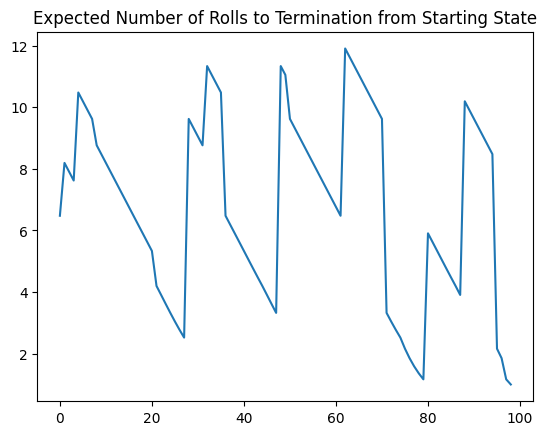

In [125]:
value_fn_vec = snl_markov_reward_process.get_value_function_vec(1.0)
print(value_fn_vec)
plt.plot(value_fn_vec)
plt.title("Expected Number of Rolls to Termination from Starting State")

**The expected number of dice rolls to finish the game from the initial state is 6.47.** We get this by treating the reward for taking a single step to be 1, such that the total expected reward is the total number of rolls.

## Question 2
Consider the problem of a frog jumping across a river with $n=9$ lilypads. The frog at every time step will randomly jump to a position in front of it (e.g. at the starting step, the frog will jump with $\frac{1}{10}$ probability to each of the lilypads or $\frac{1}{10}$ to the other side of the river). A diagram of the frog jumping problem is below.

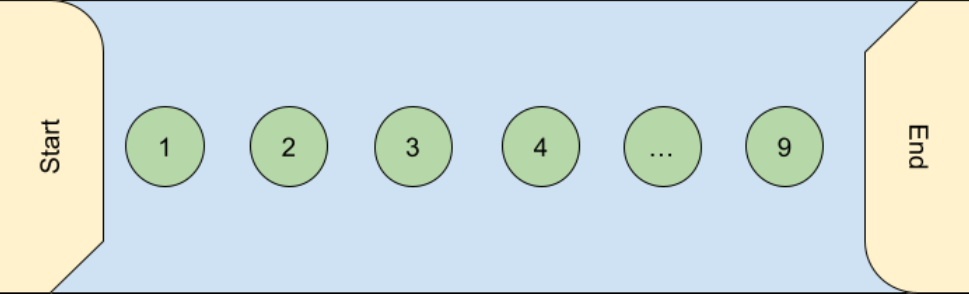

### Part a
Formalize the states of the jumping frog problem as well as the structure of the transition probabilites.

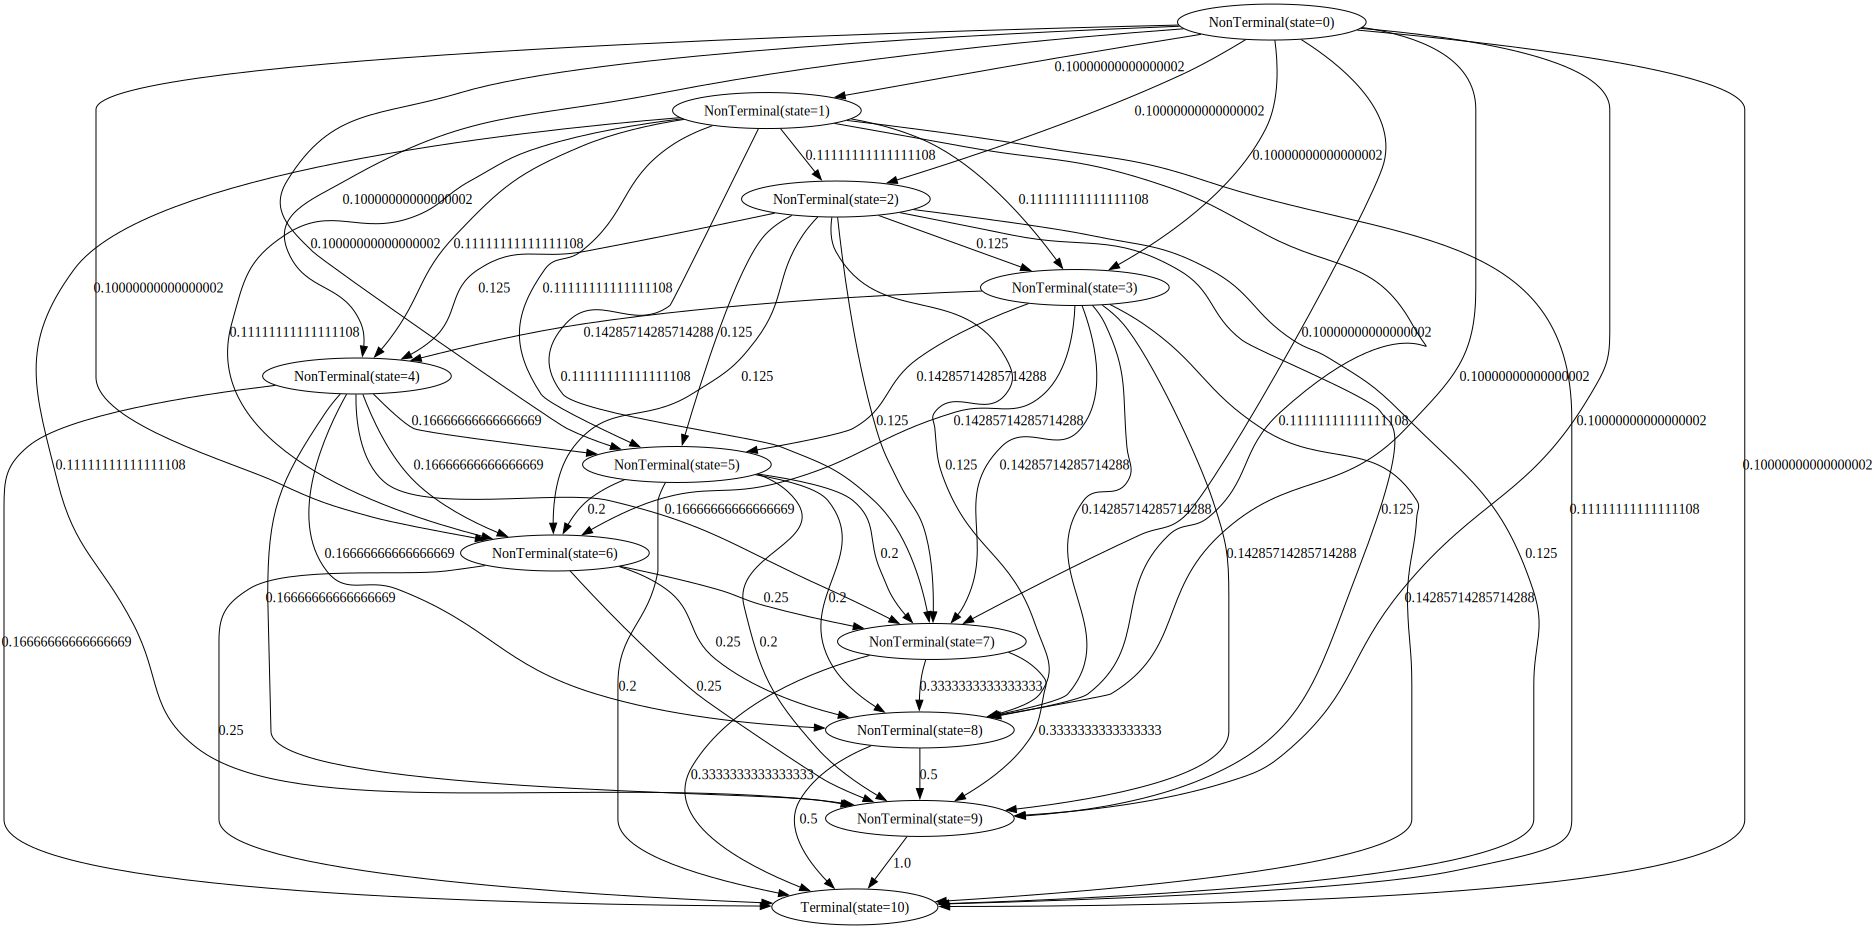

In [42]:
frog_states = range(0, 11) # start (0) to end (10)

class FrogJumpingDistribution(FiniteDistribution[S]):
    def __init__(self, possible_states: List[S], transition_probabilities: List[S]):
        self.transition_table = dict(zip(possible_states, transition_probabilities))
    
    def table(self) -> Mapping[S, float]:
        return self.transition_table

def transition_probabilities(state: S) -> Transition[S]:
    possible_states = list(range(state+1, 11))
    transition_probs = [1.0/len(possible_states)] * len(possible_states)

    return FrogJumpingDistribution(possible_states, transition_probs)

# exclusive range since 100 is a terminal state
frog_transition_map: Transition[S] = { state : transition_probabilities(state) for state in frog_states[:-1] }

frog_jumping_markov_process = FiniteMarkovProcess(frog_transition_map)

frog_jumping_markov_process.generate_image()

### Part b
Compute the expected number of steps that it would take for the frog to reach the other side.

$$E[\text{steps to end}] = 1 \cdot \frac{1}{10} + 2 \cdot (\frac{9}{10} \cdot \frac{1}{9}) + 3 \cdot (\frac{9}{10} \cdot \frac{8}{9} \cdot \frac{1}{8}) + \cdots + 10 \cdot (\frac{9}{10} \cdot \frac{8}{9} \cdot \frac{7}{8} \cdots \frac{1}{2} \cdot {1})$$
$$= \frac{1}{10} \cdot \sum_{i=1}^{10} i = 5.5$$

In [106]:
print(sum(list(range(1, 10+1))) / 10)

5.5


### Part c
Provide a closed form solution for the expected number of steps / jumps to cross the river for arbitrary $n$. A formal proof is not required. 

$$E[\text{steps to end}] = 1 \cdot \frac{1}{n+1} + 2 \cdot (\frac{n}{n+1} \cdot \frac{1}{n}) + 3 \cdot (\frac{n}{n+1} \cdot \frac{n-1}{n} \cdot \frac{1}{n-1}) + \cdots + n \cdot (\frac{n}{n+1} \cdot \frac{n-1}{n} \cdot \frac{n-2}{n-1} \cdots \frac{1}{2} \cdot {1})$$
$$= \frac{1}{n+1} \cdot \sum_{i=1}^{n+1} i = \frac{1}{n+1} \cdot \frac{(n+1) * (n+2)}{2} = \frac{n+2}{2}$$

In [109]:
def expected_steps(n):
    return (n+2) / 2

print(expected_steps(9))

5.5


## Question 3
Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: $$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Part a
Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$

In [ ]:
# The value function is the same for all s, and we can simplify the recurrence relation from there.

### Part b
Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$

In [ ]:
# We can calculate the optimal deterministic policy using the Greedy Policy Function.

## Question 4
Consider again the problem of a frog jumping across a river with $n-1$ lilypads, labeled $1, \dots, n-1$, with the two riverbanks labeled positions $0$ and $n$. At each time step, the frog who is at lilypad $i$ has two options:
- (Strategy A) The frog moves to lilypad $i-1$  with probability $\frac{i}{n}$ and moves to lilypad $i+1$ otherwise.
- (Strategy B) The frog moves to arbitrary position from $0,\dots,n$ with equal probability.

The frog now starts on a random lilypad. A snake lives on one end of the river (say the snake lives at 0) and will eat the frog if it lands on this side of the river. The frog can escape by landing the other side of the river (i.e. position $n$). What should the frog's strategy be when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (reaching $n$ before reaching $0$)? Although there are more than one ways of solving this problem, we would like to solve it by modeling it as an MDP and identifying the Optimal Policy.

Note: Sorry for all the frog jumping questions. These games are an easy way to understand Markov Processes, without having to build out too much detail of a financial simulation. Questions will be more related to finance over time.

### Part a
Express with clear mathematical notation the state space, the action space, transition function, and rewards function of an MDP so that the frog-escape problem would be solved by arriving at the Optimal Value Function (and hence, the Optimal Policy) of the MDP.

### Part b
Write code to model this MDP as an instance of the `FiniteMarkovDecisionProcess` class. We have learnt that there exists an optimal deterministic policy, and there are $2^{n-1}$ possible deterministic policies for this problem. Write code to create each of these $2^{n-1}$ deterministic policies (as instances of `FinitePolicy` class), create a policy-implied Finite MRP for each of these deterministic policies (using the `apply_finite_policy` method of `FiniteMarkovDecisionProcess` class), and evaluate the Value Function for each of those implied Finite MRPs (using the `get_value_function_vec` method of `FiniteMarkovRewardProcess` class). This should gives you the Optimal Value Function and the Optimal Deterministic Policy.

### Part c
Plot a graph of the Optimal Escape-Probability and of the associated strategies, as a function of the states of this MDP, for $n=3, n=6$ and $n=9$. By looking at the results on this graph, what pattern do you observe for the optimal policy as you vary $n$ from 3 to 9? 

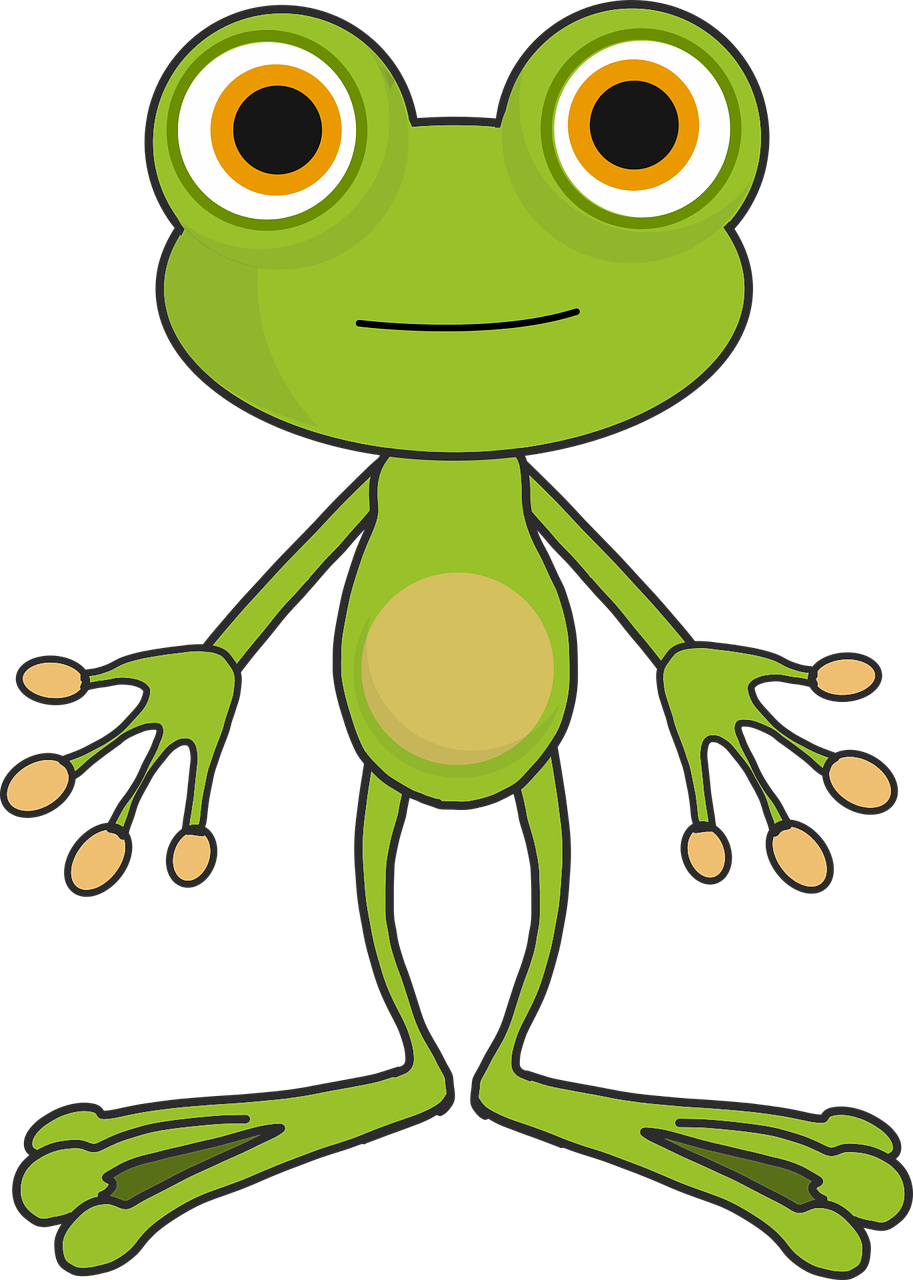